In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets\\xray_group_member_catalog_tbl.csv')
df_groups = pd.read_csv('datasets\\xray_group_catalog_tbl.csv')

In [3]:
df.head()

,gal_id,mag_auto,ra,dec,sm,sm_err,zphot,zphot_errlo,zphot_errhi,mmggs,p_mem,group_id,group_flag,dist_mmggs,mmggs_zbest,p_mem_zbest,group_id_zbest,group_flag_zbest,dist_mmggs_zbest,mnuv_mr
0,11585,23.64,149.523082,2.041357,6.77,0.047,0.064,0.055,0.080,0,0.0,NaN,0,NaN,0,0.0,NaN,0,NaN,1.085
1,11582,24.03,149.521423,2.036534,8.51,0.090,0.582,0.552,0.605,0,0.0,NaN,0,NaN,0,0.0,NaN,0,NaN,0.395
2,278453,23.58,149.562239,2.340540,8.75,0.127,0.834,0.813,0.853,0,0.0,NaN,0,NaN,0,0.0,NaN,0,NaN,0.916
3,277888,23.68,149.578539,2.374385,10.97,0.022,1.189,1.182,1.196,0,0.0,NaN,0,NaN,0,0.0,NaN,0,NaN,0.548
4,278247,23.91,149.567353,2.347392,8.68,0.074,0.658,0.625,0.702,0,0.0,NaN,0,NaN,0,0.0,NaN,0,NaN,0.867


In [4]:
df.count()

gal_id              115844
mag_auto            115844
ra                  115844
dec                 115844
sm                  115844
sm_err              115844
zphot               115840
zphot_errlo         115831
zphot_errhi         115831
mmggs               115844
p_mem               115844
group_id              8644
group_flag          115844
dist_mmggs            8644
mmggs_zbest         115844
p_mem_zbest         115844
group_id_zbest        8248
group_flag_zbest    115844
dist_mmggs_zbest      8248
mnuv_mr             115844
dtype: int64

In [5]:
len(df)-df.count()

gal_id                   0
mag_auto                 0
ra                       0
dec                      0
sm                       0
sm_err                   0
zphot                    4
zphot_errlo             13
zphot_errhi             13
mmggs                    0
p_mem                    0
group_id            107200
group_flag               0
dist_mmggs          107200
mmggs_zbest              0
p_mem_zbest              0
group_id_zbest      107596
group_flag_zbest         0
dist_mmggs_zbest    107596
mnuv_mr                  0
dtype: int64

In [6]:
df = df.dropna(subset=['group_id', 'zphot_errlo', 'zphot_errhi', 'zphot'])
df = df[df['group_flag'] == 1]
df.to_csv('datasets\\xray_groups_cleaned.csv')

In [18]:
len(df) - df.count()

gal_id                0
mag_auto              0
ra                    0
dec                   0
sm                    0
sm_err                0
zphot                 0
zphot_errlo           0
zphot_errhi           0
mmggs                 0
p_mem                 0
group_id              0
group_flag            0
dist_mmggs            0
mmggs_zbest           0
p_mem_zbest           0
group_id_zbest      381
group_flag_zbest      0
dist_mmggs_zbest    381
mnuv_mr               0
dtype: int64

In [20]:
df['group_id_zbest'].isna().value_counts()

False    5767
True      381
Name: group_id_zbest, dtype: int64

In [22]:
df['mmggs'].value_counts()

0    6020
1     128
Name: mmggs, dtype: int64

In [24]:
df.describe()

,gal_id,mag_auto,ra,dec,sm,sm_err,zphot,zphot_errlo,zphot_errhi,mmggs,p_mem,group_id,dist_mmggs,mmggs_zbest,p_mem_zbest,group_id_zbest,group_flag_zbest,dist_mmggs_zbest,mnuv_mr
count,6.148000e+03,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,6148.000000,5767.000000,6148.000000,5767.000000,6148.000000
mean,1.162527e+05,22.331096,150.101261,2.272139,9.565810,0.105628,0.486861,0.466301,0.508981,0.020820,0.484925,165.569128,0.584333,0.020820,0.462528,165.585053,0.937866,0.579364,1.981149
std,1.287848e+05,1.466958,0.287173,0.325007,0.987854,0.054807,0.256565,0.255285,0.267747,0.142792,0.323304,92.820290,0.269653,0.142792,0.349937,93.175344,0.241418,0.270326,1.644866
min,1.688000e+03,15.880000,149.489483,1.583856,5.860000,0.000000,0.006000,0.002000,0.010000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,-0.844000
25%,6.434050e+04,21.500000,149.894336,2.036901,8.860000,0.066000,0.307000,0.289000,0.323000,0.000000,0.140000,88.000000,0.377000,0.000000,0.050000,87.000000,1.000000,0.371000,0.684500
50%,1.012825e+05,22.670000,150.113695,2.295672,9.540000,0.091000,0.409000,0.387000,0.427000,0.000000,0.570000,159.000000,0.612500,0.000000,0.520000,160.000000,1.000000,0.608000,1.496000
75%,1.396245e+05,23.510000,150.347596,2.545839,10.360000,0.135000,0.700000,0.681000,0.719000,0.000000,0.780000,237.000000,0.815000,0.000000,0.780000,237.000000,1.000000,0.810000,3.372000
max,1.347070e+06,24.200000,150.692510,2.864425,11.990000,0.313000,1.084000,1.064000,2.810000,1.000000,0.990000,333.000000,1.000000,1.000000,1.000000,333.000000,1.000000,1.000000,6.301000


In [25]:
df.head()

,gal_id,mag_auto,ra,dec,sm,sm_err,zphot,zphot_errlo,zphot_errhi,mmggs,p_mem,group_id,dist_mmggs,mmggs_zbest,p_mem_zbest,group_id_zbest,group_flag_zbest,dist_mmggs_zbest,mnuv_mr
158,151638,23.91,150.407121,1.838220,9.24,0.252,1.029,1.019,1.053,0,0.68,40.0,0.616,0,0.68,40.0,1,0.616,-0.134
160,151636,23.66,150.409779,1.851822,9.90,0.174,1.014,0.955,1.030,0,0.79,40.0,0.178,0,0.79,40.0,1,0.178,0.567
162,151631,24.12,150.410013,1.849387,8.75,0.103,0.956,0.937,0.979,0,0.81,40.0,0.149,0,0.81,40.0,1,0.149,0.851
163,151630,24.18,150.410987,1.853978,10.58,0.038,0.963,0.932,1.005,0,0.79,40.0,0.210,0,0.79,40.0,1,0.210,1.818
168,151617,22.76,150.411600,1.851908,9.78,0.051,0.945,0.935,0.956,0,0.70,40.0,0.114,0,0.68,40.0,1,0.114,0.299


In [ ]:
# distribution of photo-z redshifts
plt.hist(df['zphot'], bins=50)
plt.show()

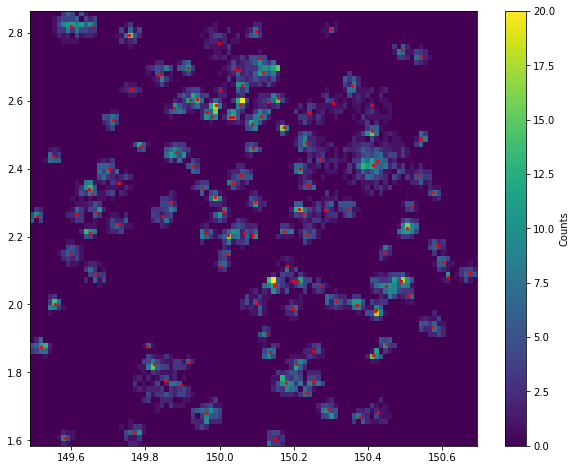

In [37]:
# location of groups with BCGs in red
mmggs = df[df['mmggs'] == 1]
fig = plt.figure(figsize=(10,8))
h = plt.hist2d(df['ra'], df['dec'], bins=(100,80))
plt.scatter(mmggs['ra'], mmggs['dec'], color='red', s=5)
plt.colorbar(h[3], label='Counts')
plt.show()

In [76]:
df['n_g'] = df.groupby('group_id').transform('nunique')
max_n_g = df['n_g'].max()

278

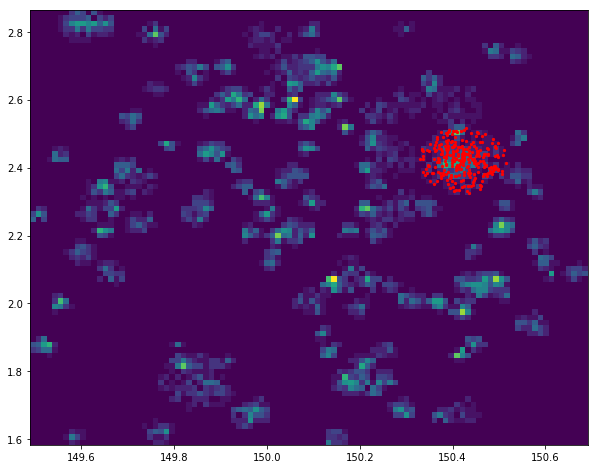

In [78]:
max_df = df.loc[df.n_g == max_n_g, 'ra':'dec'] # member galaxies of largest group

fig = plt.figure(figsize=(10,8))
plt.hist2d(df['ra'], df['dec'], bins=(100,80))
plt.scatter(max_df['ra'], max_df['dec'], color='red', s=5)
plt.show()